In [ ]:
!pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importar dataset, handling bad lines and quoting issues
df = pd.read_csv('/content/IMDB-Dataset-SPANISH.csv', on_bad_lines='skip', quoting=3)
# quoting=3 corresponds to csv.QUOTE_NONE, which disables quoting altogether.
# Alternatively, you could try quoting=csv.QUOTE_MINIMAL to quote only fields containing special characters.

# or 'warn' to get info about skipped lines

df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,"you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.""","""Uno de los otros críticos ha mencionado que después de ver solo 1 Oz Episodio",estará enganchado. Tienen razón,ya que esto es exactamente lo que sucedió conmigo. La primera cosa que me golpeó sobre Oz fue su brutalidad y sus escenas de violencia inconfiadas,que se encuentran a la derecha de la palabra. Confía en mí,este no es un espectáculo para los débiles de corazón o tímido. Este espectáculo no extrae punzones con respecto a las drogas,el sexo o la violencia. Es Hardcore,en el uso clásico de la palabra. Se llama OZ,ya que es el apodo dado al Penitenciario del Estado de Seguridad Máximo de Oswald. Se centra principalmente en la ciudad de Emeralda,una sección experimental de la prisión donde todas las células tienen frentes de vidrio y se enfrentan hacia adentro,por lo que la privacidad no es alta en la agenda. Em City es el hogar de muchos ... Fariarios,musulmanes,gangstas,latinos,cristianos,italianos,irlandeses y más ... así que las esposas,las miradas de muerte,las relaciones peligrosas y los acuerdos sombreados nunca están lejos. Yo diría el principal atractivo de El espectáculo se debe al hecho de que va donde otros espectáculos no se atreverían. Olvídate de las imágenes bonitas pintadas para las audiencias convencionales,olvidan el encanto,olviden el romance ... Oz no se mete. El primer episodio que he visto me sorprendió tan desagradable que fue surrealista,no podía decir que estaba listo para ello,pero cuando observé más,desarrollé un gusto por Oz,y me acostumbré a los altos niveles de violencia gráfica. No solo la violencia,sino la injusticia (Guardias torcidas que se vendrán por un níquel,los reclusos que se matarán en orden y se alejarán con él,de manera educada,los reclusos de clase media se convirtieron e...,puede sentirse cómodo con lo que es incómodo ...,positive,positivo
1,"""A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting",and sometimes discomforting,"sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only """"has got all the polari"""" but he has all the voices down pat too! You can truly see the seamless edi

In [ ]:
# checking dataset description
df.describe()

,Unnamed: 0,review_en,review_es,sentiment,sentimiento
count,1046,792,577,367,182
unique,575,368,185,4,2
top,positivo,negativo,positivo,positivo,positivo
freq,127,108,105,95,93


In [ ]:
#sentiment count
df['sentiment'].value_counts()

,count
sentiment,
positivo,95
positive,93
negativo,90
negative,89


In [ ]:
review = []
# Replacing 'IMDB' with 'df' to access the DataFrame
# Assuming the column name is 'Unnamed: 0' based on the description:
sentences = list(df['Unnamed: 0']) # Changed column name to 'Unnamed: 0'
for sen in sentences:
    review.append(sen)

In [ ]:
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.2)

In [ ]:
# parametros
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
# initilialize the tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token=oov_tok)
# Convert any potential float values (like NaN) to strings before fitting
train_sentences = [str(sentence) for sentence in train_sentences]
tokenizer.fit_on_texts(train_sentences)

# generate the word index dictionary for the training  sentences
# (This line was redundant, as fit_on_texts is already called above)
#tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Generate and pad training sequences
training_sequences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the test sequences
# Convert any potential float values (like NaN) to strings before processing
test_sentences = [str(sentence) for sentence in test_sentences]
testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# build the model
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Build the model explicitly
model.build(input_shape=(None, max_length))  # Replace 'None' with batch size if known

# setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

In [ ]:
# train the model
num_epochs = 10
history = model.fit(training_padded,
                    train_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, test_labels))

Epoch 1/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9911 - loss: 0.0301 - val_accuracy: 0.9980 - val_loss: 0.0070
Epoch 2/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9985 - loss: 0.0042 - val_accuracy: 0.9978 - val_loss: 0.0062
Epoch 3/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9973 - val_loss: 0.0075
Epoch 4/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9999 - loss: 2.8206e-04 - val_accuracy: 0.9970 - val_loss: 0.0088
Epoch 5/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 1.0000 - loss: 1.6869e-04 - val_accuracy: 0.9976 - val_loss: 0.0094
Epoch 6/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 1.0000 - loss: 1.8987e-04 - val_accuracy: 0.9981 - val_loss: 0.0113
Epoch 7/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9963 - val_loss: 0.0123
Epoch 8/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 1.0000 - 

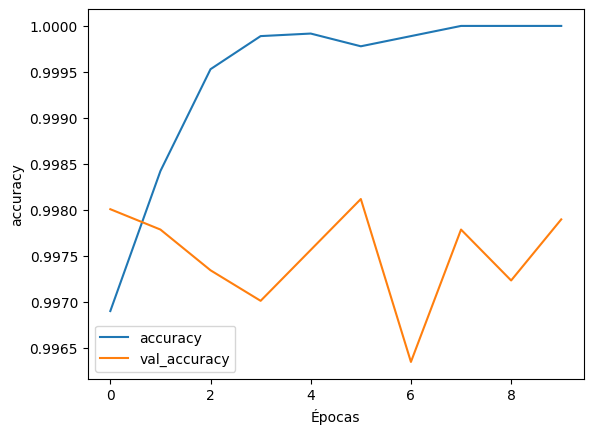

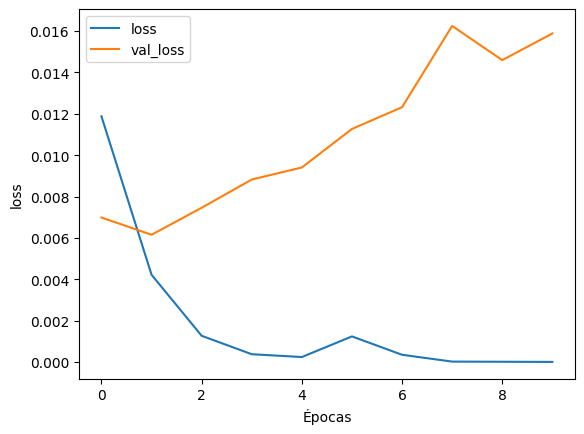

In [ ]:
# Graficar el historial de entrenamiento
def plot_graphs1(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Épocas")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs1(history, "accuracy")
plot_graphs1(history, "loss")


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(testing_padded)

# generar metricas, recall, precision, R2
print(classification_report(test_labels, y_pred.round()))

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9022
           1       0.33      0.06      0.10        18

    accuracy                           1.00      9040
   macro avg       0.67      0.53      0.55      9040
weighted avg       1.00      1.00      1.00      9040



[[9020    2]
 [  17    1]]


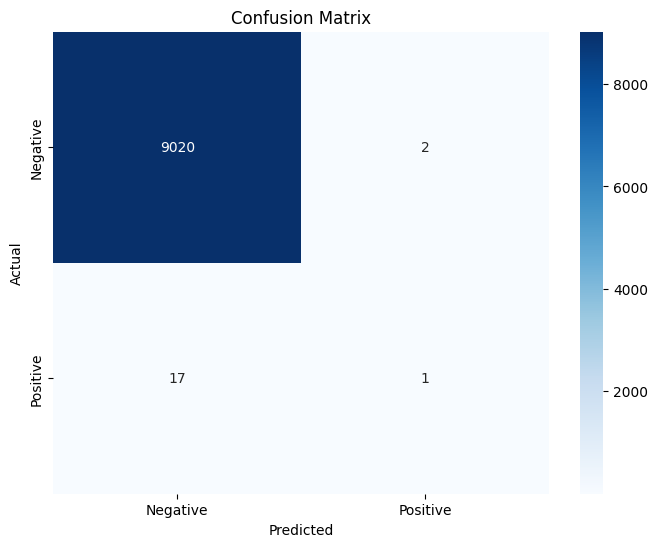

In [ ]:
# generar matriz de confusion
cm = confusion_matrix(test_labels, y_pred.round())
print(cm)

# Grafico matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Aplicando el Ejercicio pdf 3

In [ ]:
# build the model
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Build the model explicitly
model.build(input_shape=(None, max_length))  # Replace 'None' with batch size if known

# setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 120, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 120, 64)             │          20,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193,357 (755.30 KB)

 Trainable params: 193,357 (755.30 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# train the model
num_epochs = 10
history = model.fit(training_padded,
                    train_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, test_labels))

Epoch 1/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 152s 131ms/step - accuracy: 0.9978 - loss: 0.0494 - val_accuracy: 0.9980 - val_loss: 0.0144
Epoch 2/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 202s 131ms/step - accuracy: 0.9981 - loss: 0.0139 - val_accuracy: 0.9980 - val_loss: 0.0144
Epoch 3/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 203s 132ms/step - accuracy: 0.9976 - loss: 0.0168 - val_accuracy: 0.9980 - val_loss: 0.0144
Epoch 4/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 222s 150ms/step - accuracy: 0.9982 - loss: 0.0135 - val_accuracy: 0.9980 - val_loss: 0.0144
Epoch 5/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 203s 150ms/step - accuracy: 0.9976 - loss: 0.0173 - val_accuracy: 0.9980 - val_loss: 0.0144
Epoch 6/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 181s 132ms/step - accuracy: 0.9981 - loss: 0.0142 - val_accuracy: 0.9980 - val_loss: 0.0144
Epoch 7/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 149s 132ms/step - accuracy: 0.9976 - loss: 0.0167 - val_accuracy: 0.9980 - val_loss: 0.0145
Epoch 8/10
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 202s 132ms/step - ac

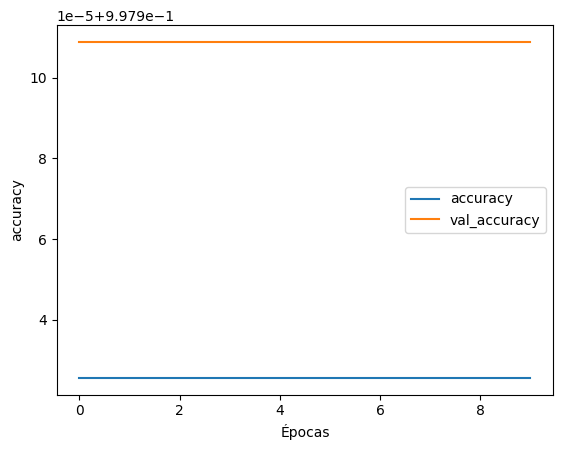

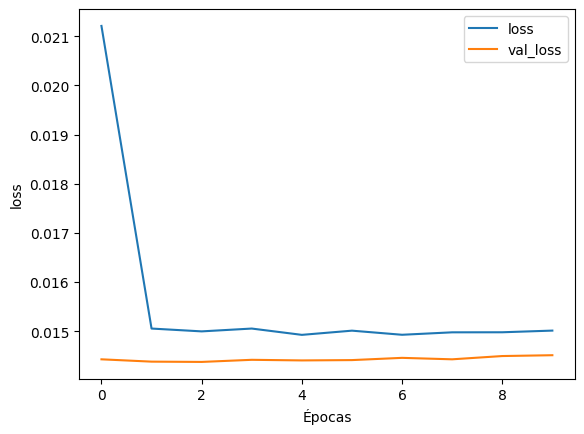

In [ ]:
# Graficar el historial de entrenamiento
def plot_graphs1(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Épocas")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs1(history, "accuracy")
plot_graphs1(history, "loss")

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(testing_padded)

# generar metricas, recall, precision, R2
print(classification_report(test_labels, y_pred.round()))

283/283 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9022
           1       0.00      0.00      0.00        18

    accuracy                           1.00      9040
   macro avg       0.50      0.50      0.50      9040
weighted avg       1.00      1.00      1.00      9040



[[9022    0]
 [  18    0]]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

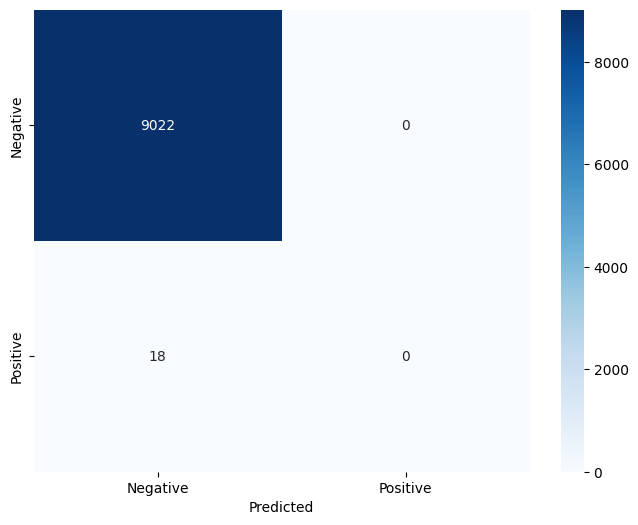

In [ ]:
# generar matriz de confusion
cm = confusion_matrix(test_labels, y_pred.round())
print(cm)

# Grafico matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt

In [ ]:
from google.colab import files

# Guardar notebook como HTML
!jupyter nbconvert --to html /content/Ejercicio_pdf_4.ipynb

# Descargar el archivo HTML
files.download('Ejercicio_pdf_4.html')

[NbConvertApp] Converting notebook /content/Ejercicio_pdf_4.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 540204 bytes to /content/Ejercicio_pdf_4.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>